In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import subprocess
from glob import glob

from pkg import u,m

# dataset_num = input("Enter dataset number: ")
# dataset = dataset_num.zfill(2) # string (ex '01')
dataset = '01'

pm = u.PathManager(dataset=dataset)
p = u.Processor(paths=pm, dataset=dataset)
clen, photon_energy = p.get_parameters()
print(f"clen: {clen}, photon_energy: {photon_energy}")
# instances
pm = u.PathManager(dataset=dataset)
peak_paths, water_peak_paths, labels, water_background_path = pm.select_dataset(dataset=dataset)
p = u.Processor(paths=pm, dataset=dataset)

clen: 1.5, photon_energy: 6000


In [2]:
u.get_counts(pm)
%run process_directory.py ../../images  --percent_empty 0.4
u.get_counts(pm)


Paths refreshed for dataset 01.
Directory: peaks/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directory: labels/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directory: peaks_water_overlay/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directories '01' through '09' already created in '../../images/labels'.
Directories '01' through '09' already created in '../../images/peaks'.
Directories '01' through '09' already created in '../../images/peaks_water_overlay'.
Directories '01' through '09' already created in '../../images/water'.
Directories for dataset 01 have been processed. Matching file counts found.
Directories for dataset 02 have been processed. Matching file counts found.
Directories for dataset 03 have been processed. Matching file counts found.
Directories for dataset 04 have been processed. Matching file counts found.
Directories for dataset 05 have been processed. Matching file counts found.
Directories for dataset 06 have been proces

FileNotFoundError: [Errno 2] No such file or directory: '/home/eseverett/Desktop/CXFEL/cxls_hitfinder/images/peaks/00'

Paths refreshed for dataset 01.
Directory: peaks/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directory: labels/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directory: peaks_water_overlay/01
  Total files: 54
  Normal images: 39
  Empty images: 15


In [3]:
dm = u.DatasetManager(paths=pm, dataset=dataset, parameters=(clen, photon_energy), transform=None)

# peak, label, overlay are valid types
u.check_attributes(paths=pm, dataset=dataset, type='peak') 
u.check_attributes(paths=pm, dataset=dataset, type='overlay')
u.check_attributes(paths=pm, dataset=dataset, type='label')

train_loader, test_loader = u.prepare(data_manager=dm, batch_size=10)

Paths refreshed for dataset 01.
Directory: peaks/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directory: labels/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Directory: peaks_water_overlay/01
  Total files: 54
  Normal images: 39
  Empty images: 15
Paths refreshed for dataset 01.
Actual percentage of empty images: 27.77777777777778% across peaks, water_overlays, and labels directories.

All files in dataset 01 of type 'peak' have matching attributes.
All files in dataset 01 of type 'label' have matching attributes.
All files in dataset 01 of type 'overlay' have matching attributes.
All files in dataset 01 of type 'background' have matching attributes.
Dataset 01 authenticated.

All files in dataset 01 of type 'peak' have matching attributes.
All files in dataset 01 of type 'overlay' have matching attributes.
All files in dataset 01 of type 'label' have matching attributes.

Data prepared.
Train size: 43
Test size: 11
Batch size: 10
Number of batches in trai

In [4]:
dir(m)

['BasicCNN1',
 'BasicCNN2',
 'DenseNet121_Weights',
 'DenseNetBraggPeakClassifier',
 'F',
 'ResNet50BraggPeakClassifier',
 'ResNet50_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'models',
 'nn',
 'np',
 'optim',
 'os',
 'torch']

In [5]:
model1 = m.BasicCNN3()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cfg = {
    'num_epochs': 5,
    'num_classes': 2,
    'batch_size': train_loader.batch_size,
    'test_size': len(train_loader.dataset),
    'test_size': len(test_loader.dataset),
    'criterion': criterion,
    'optimizer': optimizer,
    'device': device,
    'model': model1,
}

# # arguments: self, model, loader: list, criterion, optimizer, device, cfg: dict
t = u.TrainTestModels(model=model1, loader=[train_loader, test_loader], criterion=criterion, optimizer=optimizer, device=device, cfg=cfg)

In [6]:
t.epoch_loop()

Model testing and validating: BasicCNN1
-- epoch 0
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
Train loss: 0.15663082897663116
Train accuracy: 1.0
Test loss: 0.06265233159065246
Test accuracy: 1.0
-- epoch 1
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
Train loss: 0.15663082897663116
Train accuracy: 1.0
Test loss: 0.06265233159065246
Test accuracy: 1.0
-- epoch 2
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
tensor([1.], requires_grad=True) tensor([1.])
Train loss: 0.15663082897663116
T

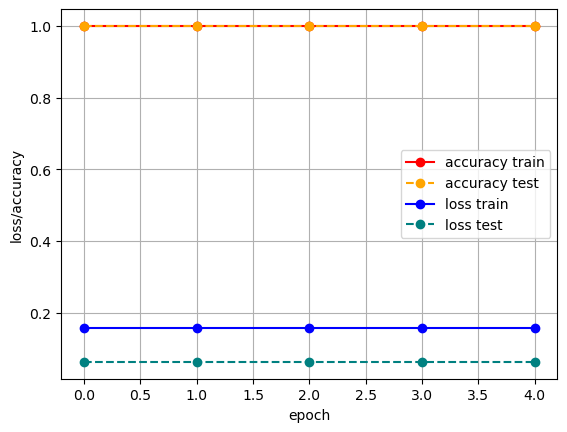

In [7]:
t.plot_loss_accuracy()

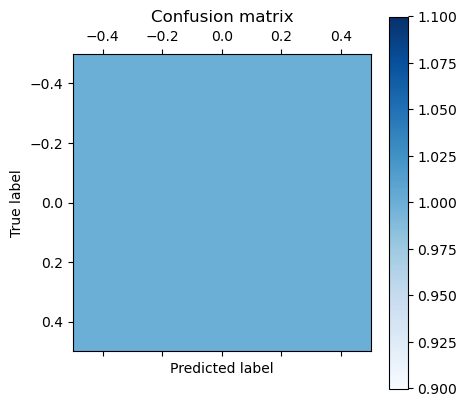

In [8]:
t.plot_confusion_matrix()

In [9]:
t.get_confusion_matrix()

array([[1.]])